In [2]:
import pandas as pd;
import seaborn as sbr;
import statistics as st;

## Analise Exploratoria



In [3]:

datasets = pd.read_csv("Churn.csv", sep=";")



In [4]:
datasets.head()



,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [5]:
datasets.columns= ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","CartaoCredito"
                   ,"Ativo","Salario","Saida" ]

In [6]:
def agrupado(dataset,info):
    return dataset.groupby([info]).size()
    

In [7]:
# Dados categorigos
estados = agrupado(datasets,"Estado")
estados



Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [8]:
genero = agrupado(datasets,"Genero")
genero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [9]:
# Explorando colunas mericas
score = datasets["Score"]


/home/c4p1t4n/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Score')

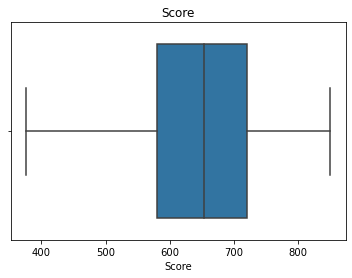

In [10]:
sbr.boxplot(score).set_title("Score")

In [11]:
idade = datasets["Idade"]
idade.describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

/home/c4p1t4n/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Idade'>

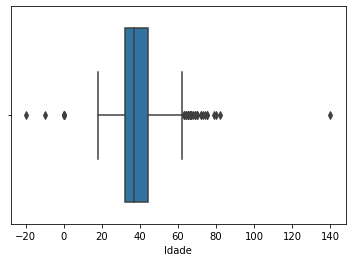

In [12]:
sbr.boxplot(idade)

/home/c4p1t4n/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Idade')

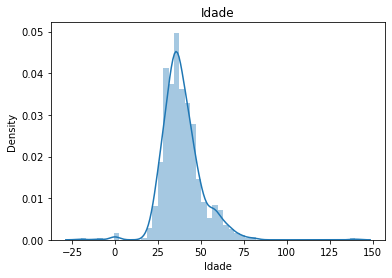

In [13]:
sbr.distplot(idade).set_title("Idade")

In [14]:
saldo = datasets["Saldo"]
saldo.describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

/home/c4p1t4n/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Saldo'>

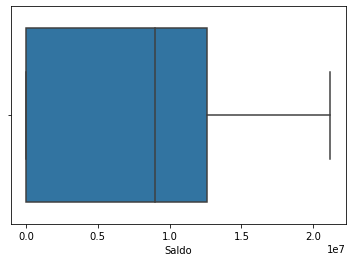

In [15]:
sbr.boxplot(saldo)

/home/c4p1t4n/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'saldo')

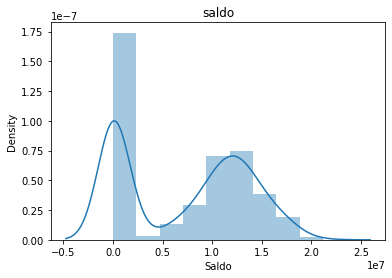

In [16]:
sbr.distplot(saldo).set_title("saldo")

In [17]:
salario = datasets["Salario"]
salario

0      10134888.0
1      11254258.0
2      11393157.0
3       9382663.0
4        790841.0
          ...    
994    14576583.0
995     8391224.0
996     7843973.0
997      677692.0
998      990342.0
Name: Salario, Length: 999, dtype: float64

/home/c4p1t4n/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salario', ylabel='Density'>

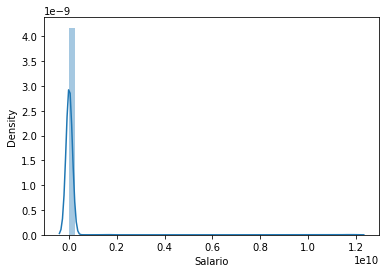

In [18]:
sbr.distplot(salario)

## Tratamento de dados

In [19]:
datasets.isnull().sum()

Id               0
Score            0
Estado           0
Genero           8
Idade            0
Patrimonio       0
Saldo            0
Produtos         0
CartaoCredito    0
Ativo            0
Salario          7
Saida            0
dtype: int64

In [20]:
mediana = st.median(datasets['Salario'])
mediana


70518.0

In [21]:
#Substituir NAN por  mediana
datasets['Salario'].fillna(mediana,inplace=True)

In [22]:
#verificando se ainda existe Valores nulos
datasets['Salario'].isnull().sum()

0

In [23]:
# Falta de padronização e NaNs

agrupado(datasets,'Genero')

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [24]:
#Substituindo os valores faltantes pela moda
datasets['Genero'].fillna('Masculino',inplace=True)

In [25]:
# Verificando valores
agrupado(datasets,'Genero')

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    529
dtype: int64

In [26]:
# Padronizando dados
    #Padronizando como Masculino
datasets.loc[datasets['Genero'] == 'M','Genero'] = 'Masculino'
    #Padronizando como Feminino
datasets.loc[datasets['Genero'].isin(['Fem','F']),'Genero'] = 'Feminino'
agrupado(datasets,'Genero')
    

Genero
Feminino     464
Masculino    535
dtype: int64

In [27]:
# idades fora do padrão
datasets['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [38]:
datasets.loc[(datasets['Idade'] < 0) |  (datasets['Idade'] > 110   )]   

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartaoCredito,Ativo,Salario,Saida


In [36]:
mediana = st.median(datasets['Idade'])
mediana

37

In [39]:
# Substituindo outliers
datasets.loc[(datasets['Idade'] < 0) |  (datasets['Idade'] > 110   )]  = mediana

In [44]:
# Verificando ID repetido
datasets[datasets.duplicated(["Id"],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartaoCredito,Ativo,Salario,Saida
36,37,490,SC,Masculino,31,3,14526023,1,0,1,11406677.0,0
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,37,37,37,37,37,37,37,37,37,37,37.0,37
984,37,37,37,37,37,37,37,37,37,37,37.0,37
990,37,37,37,37,37,37,37,37,37,37,37.0,37


In [46]:
# Removendo registros duplicados
datasets.drop_duplicates(subset="Id",keep="first",inplace=True)
# Verificando se os dados duplicados foram removidos
datasets[datasets.duplicated(["Id"],keep=False)]


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartaoCredito,Ativo,Salario,Saida


In [47]:
# Verificando Estados fora do dominio
agrupado(datasets,"Estado")

Estado
PR    257
RP      1
RS    474
SC    258
SP      4
TD      1
dtype: int64

In [56]:
#Substituindo outliers pela moda
datasets.loc[datasets["Estado"].isin(["SP","TD","RP"]),"Estado"] = "RS" 
# Verificando se foi tratado
agrupado(datasets,"Estado")


Estado
PR    257
RS    480
SC    258
dtype: int64

In [60]:
#Tratando Salario
desvio=st.stdev(datasets['Salario'])
desvio


529784177.6096346

In [64]:
# Salarios fora do padrão
datasets.loc[datasets['Salario'] >= 2 * desvio ,'Salario'] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartaoCredito,Ativo,Salario,Saida
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [68]:
mediana = st.median(datasets['Salario'])
mediana


8641028.0

In [71]:
# Substituindo os valores fora do padrão para mediana
datasets.loc[datasets['Salario'] >= 2 * desvio ,'Salario'] = mediana
#Verificando se os valores foram substituidos
datasets.loc[datasets['Salario'] >= 2 * desvio ] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartaoCredito,Ativo,Salario,Saida


In [74]:
datasets.shape

(995, 12)